In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import random
%matplotlib inline

In [2]:
# loads the diabetes dataset
diabetes = datasets.load_diabetes()

# Diabetes Dataset
<img src="diabetes_dataset.png", align="left">

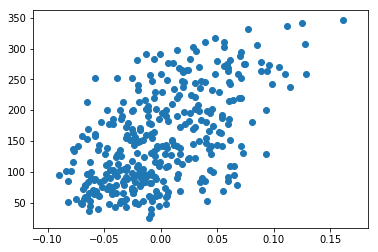

In [3]:
# take only 2nd feature of dataset
X = diabetes.data[:, np.newaxis, 2]
Y = diabetes.target.reshape(442,1)

# spliting to train and test
x_train = X[:350]
y_train = Y[:350]

x_test = X[351:]
y_test = Y[351:]

plt.scatter(x_train,y_train)
plt.show()

In [4]:
class Lin_reg():
    def __init__(self, epoch=5000, learning_rate=1):
        self.epoch = epoch                   # max iterations
        self.learning_rate = learning_rate   # learning rate
        self.bias = 1
        self.theta = random.random()         # initializing parameter
        self.iteration = 0                   # stores count of iteration
        self.tolerance = 0.001               # minimum error
        self.params = {'b': [], 'w': [], 'loss': []}
        
    def fit(self, x, y):
        m = x.shape[0]                       # training examples
        for i in range(self.epoch):          # iterate till maximum epoch
            init_bias = self.bias
            init_theta = self.theta
            
            y_hat = self.bias + self.theta*x_train     # prediction
            loss = (0.5/m) * (y_hat - y)**2            # mean squared error
            dloss = y_hat - y                          # loss gradient
            
            # updating parameters
            self.bias = self.bias - self.learning_rate*np.sum(dloss)/m
            self.theta = self.theta - self.learning_rate*np.sum(dloss*x)/m
        
            # saving parameters
            self.params['b'].append(self.bias)
            self.params['w'].append(self.theta)
            self.params['loss'].append(np.sum(loss))
            
            self.iteration = i
            
            # getting change in parameter value
            change = abs(init_bias-self.bias)+abs(init_theta-self.theta)
            if(change < self.tolerance):
                break                        # stop training when tolerance reached 
                
    def predict(self, x):
        return (self.bias + self.theta*x_test)

In [5]:
model = Lin_reg()                   # initializing model
model.fit(x_train, y_train)         # training model
y_predict = model.predict(x_test)   # prediction
print('Iterations to converge:', model.iteration)

Iterations to converge: 3577


<IPython.core.display.Javascript object>


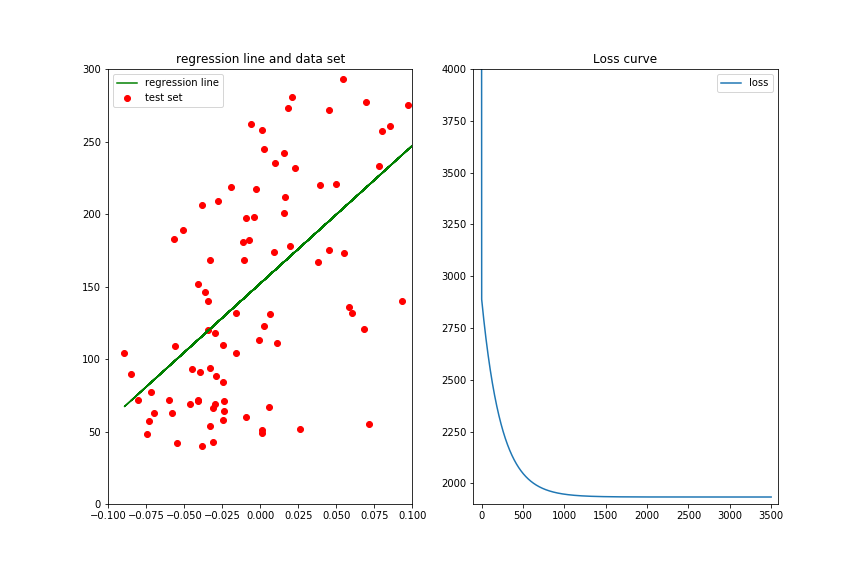

<IPython.core.display.Javascript object>


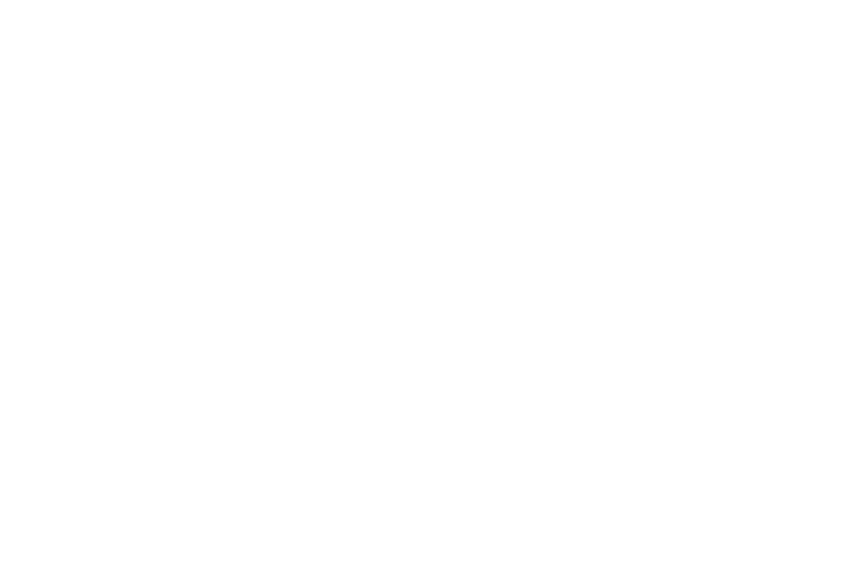

In [6]:
# Live Plotting

%matplotlib notebook

plt.ion()

fig = plt.figure(figsize=(12, 8))
fig.show()
fig.canvas.draw()

ax = fig.axes.copy()
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

for i in range(0, len(model.params['w']), 100):

    ax.clear()
    ax1.clear()
    ax1.plot(model.params['loss'][:i])

    weights = model.params['w'][i]
    bias = model.params['b'][i]
    pred = weights*x_test + bias
    
    ax.scatter(x_test, y_test, c = 'r')
    ax.plot(x_test, pred,c = 'g')
    ax.axis([-0.1,0.1,0,300])
    ax.legend(['regression line','test set'])
    ax.set_title('regression line and data set')
    
    ax1.axis([-100,model.iteration,1900,4000])
    ax1.legend(['loss'])
    ax1.set_title('Loss curve')
    
    fig.canvas.draw()

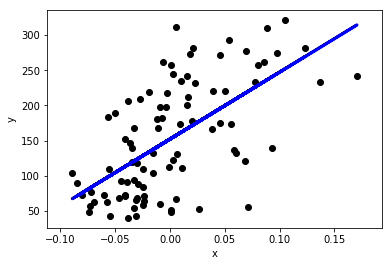

In [7]:
%matplotlib inline
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_predict, color='blue', linewidth=3)

plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Sk Learn Implementation

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model_sk = LinearRegression()
model_sk.fit(x_train, y_train)
y_predict_sk = model_sk.predict(x_test)

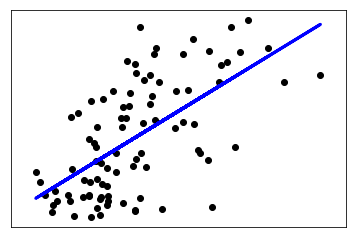

In [10]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_predict_sk, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()